In [1]:
%load_ext autoreload
%autoreload 2
%cd /workspace/CRAFT-pytorch/my-src
# !pip install annoy

/workspace/CRAFT-pytorch/my-src


In [10]:
%autoreload 2
import glob
from PIL import Image
import torch
import torchvision.transforms as transforms
from algo.kmeans import lloyd
from model.vgg import VGGFeatures

model = VGGFeatures().to("cpu")
model.eval()
trans = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
    ]
)

df = dict()
for i, f in enumerate(glob.glob("/workspace/CRAFT-pytorch/data/pin/*jpg")):
    try:
        x = trans(Image.open(f)).unsqueeze(0)
        x = model(x)
    except:
        continue
    df[i] = (x.data.squeeze(0), f)
# feats = torch.cat(feats, dim=0).numpy()
# idx, ctr = lloyd(feats, 2, opt.device)

In [17]:
v, f = df[0]
v.shape[0]

8192

In [19]:
from annoy import AnnoyIndex
import random

v, f = df[0]
a = AnnoyIndex(v.shape[0], 'euclidean')  # Length of item vector that will be indexed
for k, (v, f) in df.items():
    a.add_item(k, v)

a.build(100) # 100 trees

True

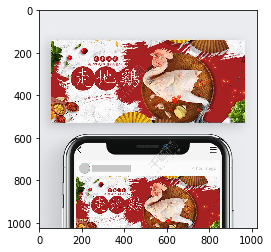

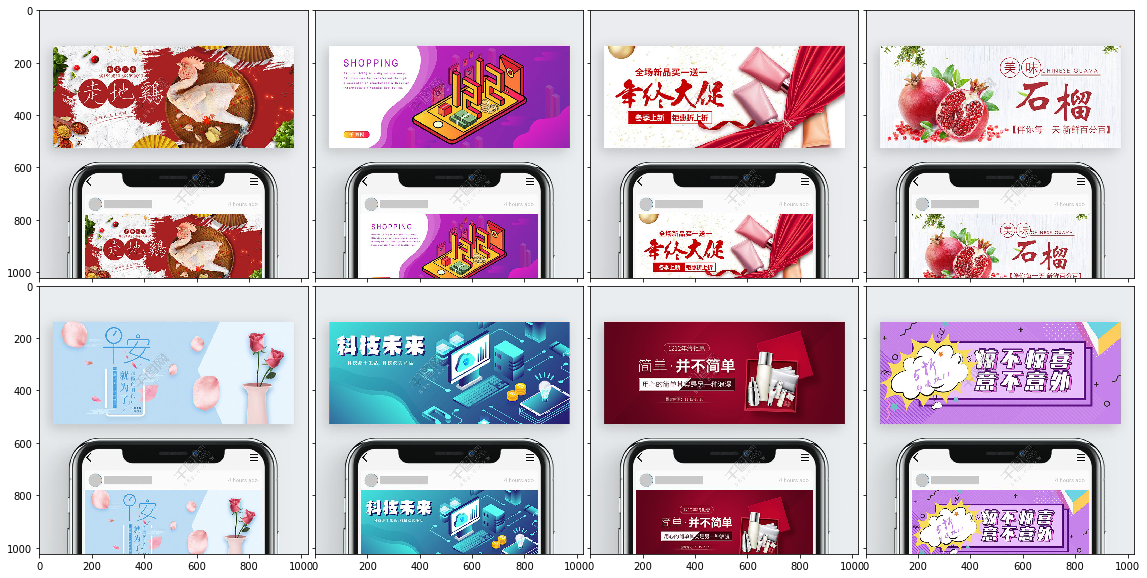

In [53]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.axes_grid1 import ImageGrid

q_id = 3
plt.imshow(imread(df[q_id][1]))

fig = plt.figure(figsize=(20., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 4), axes_pad=0.1)

# for i in a.get_nns_by_vector([0.3, 0.3, 0.3, 0.3, 0.3], 3)
# for ax, im in zip(grid, [imread(df[0][1]), imread(df[0][1]), imread(df[0][1]), imread(df[0][1])]):
#     ax.imshow(im)
for ax, i in zip(grid, a.get_nns_by_item(q_id, 8)):
    ax.imshow(imread(df[i][1]))